# Machine Learning Model Evaluations and Predictions

ANN Model

In [ ]:
df = df_norm

In [ ]:
# independent and dependent variables
x = df.drop('Divorce',axis=1)
y = df['Divorce']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=10)
print(xtrain.shape)
print(xtest.shape)

(80, 29)
(20, 29)


In [ ]:
# import tensorflow
import tensorflow as tf
#import keras 
from tensorflow import keras

In [ ]:
# define sequential model
model = keras.Sequential([
    # input layer
    keras.layers.Dense(19, input_shape=(29,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10,activation = 'relu'),
    # we use sigmoid for binary output
    # output layer
    keras.layers.Dense(1, activation='sigmoid')
]
)

In [ ]:
# time for compilation of neural net.
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
# now we fit our model to training data
model.fit(xtrain,ytrain,epochs=100)

Epoch 1/100
3/3 [==============================] - 3s 8ms/step - loss: 0.6984 - accuracy: 0.4625
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6948 - accuracy: 0.4875
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6923 - accuracy: 0.4625
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6912 - accuracy: 0.4875
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6894 - accuracy: 0.5250
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6881 - accuracy: 0.5625
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6867 - accuracy: 0.6125
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6860 - accuracy: 0.6000
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6845 - accuracy: 0.6000
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6834 - accuracy: 0.6375
Epoch 11/100
3/3 [===========

In [ ]:
# evalute the model
model.evaluate(xtest,ytest)

1/1 [==============================] - 0s 130ms/step - loss: 1.1298 - accuracy: 0.4500


[1.1297755241394043, 0.44999998807907104]

In [ ]:
# predict the churn values
ypred = model.predict(xtest)
print(ypred)
# unscaling the ypred values 
ypred_lis = []
for i in ypred:
    if i>0.5:
        ypred_lis.append(1)
    else:
        ypred_lis.append(0)
print(ypred_lis)

1/1 [==============================] - 0s 72ms/step
[[0.338511  ]
 [0.23674269]
 [0.17988242]
 [0.8568152 ]
 [0.8215685 ]
 [0.89315194]
 [0.58712816]
 [0.9296357 ]
 [0.05619481]
 [0.56104064]
 [0.89967763]
 [0.8580084 ]
 [0.8546694 ]
 [0.08522673]
 [0.729479  ]
 [0.89684737]
 [0.72447056]
 [0.7976243 ]
 [0.52543646]
 [0.17220588]]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0]


In [ ]:
#make dataframe for comparing the orignal and predict values
data = {'orignal_divorsed':ytest, 'predicted_divorsed':ypred_lis}
df_check = pd.DataFrame(data)
df_check.head(10)

,orignal_divorsed,predicted_divorsed
19,0,0
14,1,0
43,1,0
37,1,1
66,0,1
3,0,1
79,1,1
41,1,1
38,1,0
68,0,1


Text(129.5, 0.5, 'True_number')

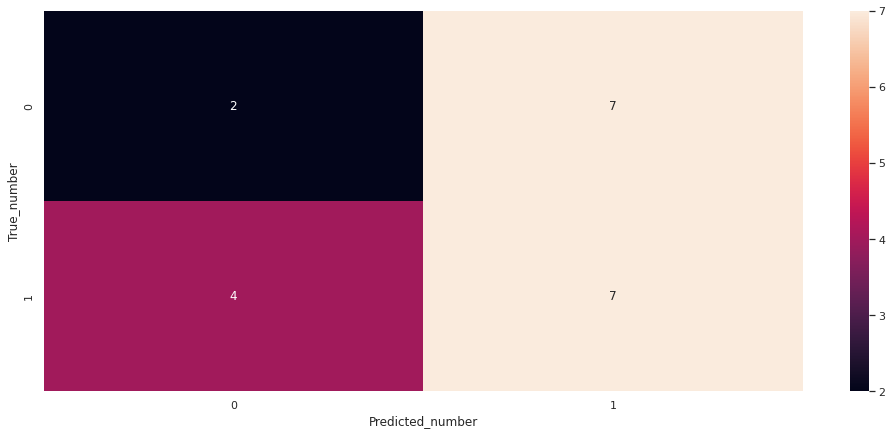

In [ ]:
# checking for performance metrices
#importing classification_report and confusion metrics
from sklearn.metrics import confusion_matrix, classification_report
#print classification_report
# print(classification_report(ytest,ypred_lis))
# ploting the confusion metrix plot
conf_mat = tf.math.confusion_matrix(labels=ytest,predictions=ypred_lis)
plt.figure(figsize = (17,7))
sns.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted_number')
plt.ylabel('True_number')


In [ ]:
# X = df_new.drop(['DivorceProbability','Divorce'], axis = 1)
# Y  = df_new['Divorce']
# from sklearn.ensemble import ExtraTreesClassifier
# model = ExtraTreesClassifier() 
# model.fit(X,Y)
# plot_ranked_feature= pd.Series(model.feature_importances_,index= X.columns)
# plot_ranked_feature.nlargest(29).plot(kind = 'barh')
# plt.show()

## After going through the above EDA we will develop some predictive models and compare them.

We will develop Logistic Regression, Random Forest, SVM, ADA Boost and XG Boost

In [ ]:
df.head()

,Age_Gap,Education,Economic_Similarity,Social_Similarities,Cultural_Similarities,Social_Gap,Common_Interests,Religion_Compatibility,No_Children_Previous Marriage,Desire_to_Marry,Independency,Relationship_with_Spouse Family,TradingIn,Engagement_Time,Love,Commitment,Mental_Health,Sense_of_Having_Children,Previous_Trading,Previous_Marriage,Proportion_Common_Genes,Addiction,Loyalty,Height_Ratio,Good_Income,Relation_Non_spouse_Before_Marriage,Spouse_Confirmed_by_Family,Divorce_Famil_Grade_1,Socializing_Opposite_Sex,Divorce
0,0.000000,0.229932,0.096503,0.759308,0.474368,0.486709,0.754950,0.835622,0.857419,0.205549,0.267719,0.724562,0.793190,0.492531,0.582400,0.602610,0.411376,0.857986,0.491675,0.452581,0.412411,0.523563,0.370996,0.307847,0.963629,0.116898,0.059026,0.139567,0.373549,1
1,0.337123,0.495896,0.828023,0.473800,0.295544,0.526305,0.099434,0.984033,0.848331,0.385596,0.659766,0.915260,0.635853,0.370515,0.439874,0.514752,0.616342,0.569775,0.322791,0.076881,0.838968,0.250099,0.695791,0.697908,0.403667,0.005282,0.029034,0.978815,0.182341,0
2,0.666787,0.448613,0.254234,0.583692,0.094550,0.760743,0.596572,0.410780,0.043509,0.443365,0.769188,0.153471,0.648788,0.618791,0.318568,0.942698,0.623775,0.202669,0.079159,0.822612,0.473247,0.642762,0.026840,0.602767,0.214390,0.827684,0.671753,1.000000,0.013354,1
3,0.529154,0.182523,0.671907,0.030305,0.000000,0.536283,1.000000,0.701627,0.600788,0.000000,0.061856,0.144279,0.318418,0.061220,0.731923,0.403826,0.275528,0.396422,0.374801,0.285427,0.940179,0.117281,1.000000,0.413694,0.427760,0.552300,0.611973,0.455621,0.793879,0
4,0.701873,0.856162,0.767425,0.249309,0.934559,0.730927,0.012434,0.107143,0.342199,0.895931,0.100091,0.811856,0.824137,0.908147,0.615743,0.565807,0.232412,1.000000,0.739379,0.036504,0.026684,0.753673,0.015125,0.915142,0.513915,0.992840,0.730326,0.031739,0.299709,0


In [ ]:
df_dummies=df

**1. Logistic Regression**

In [ ]:
# We will use the data frame where we had created dummy variables
y = df_dummies['Divorce'].values
X = df_dummies.drop(columns = ['Divorce'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [ ]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [ ]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.5666666666666667


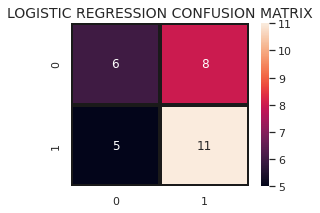

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,  prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

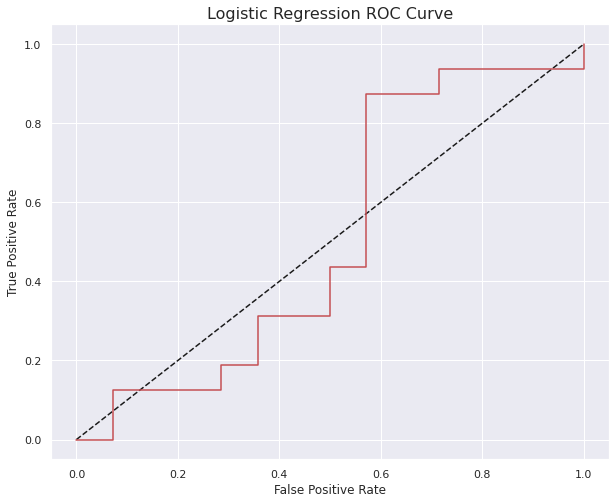

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();


AxesSubplot(0.125,0.125;0.775x0.755)


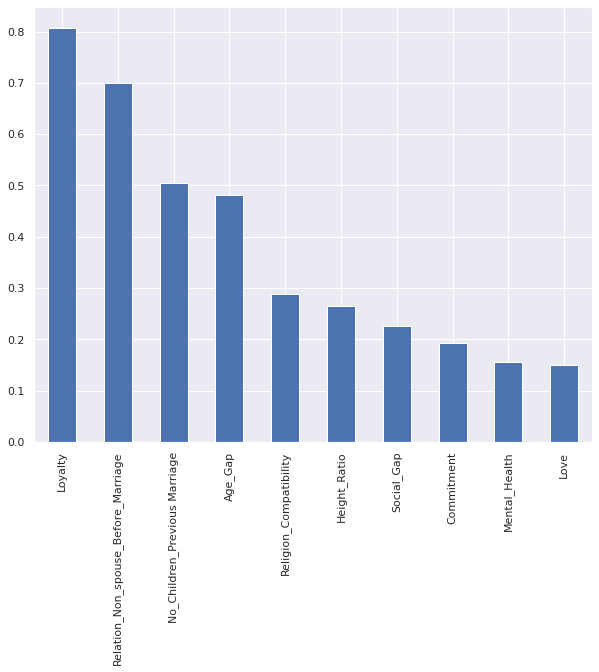

In [ ]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))


AxesSubplot(0.125,0.125;0.775x0.755)


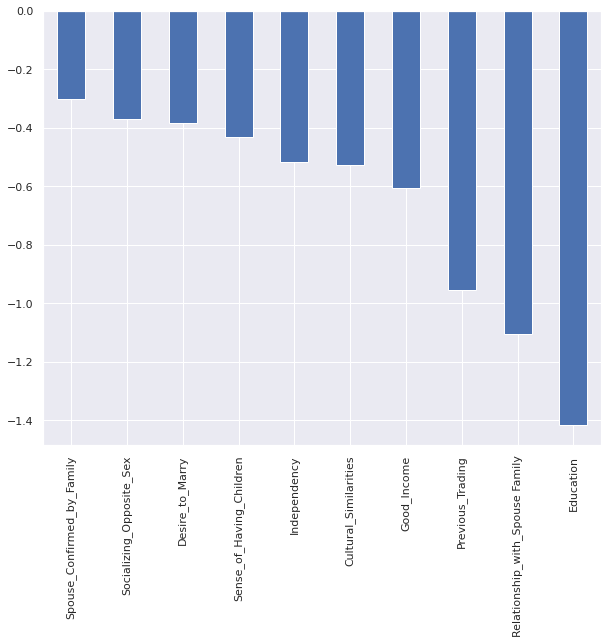

In [ ]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

**2. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.5


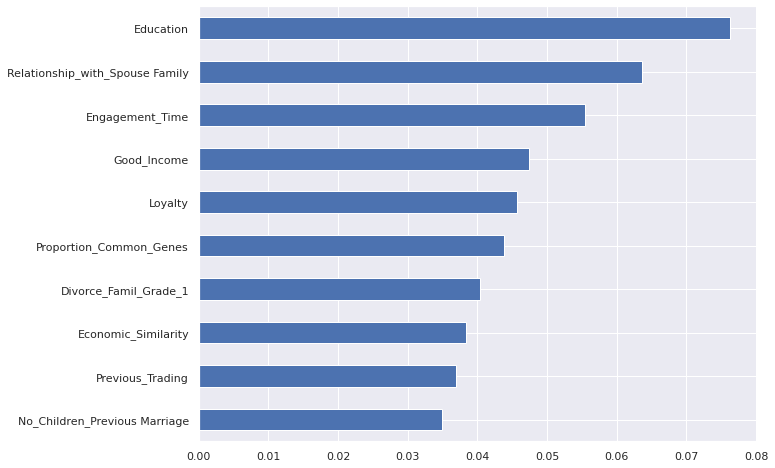

In [ ]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

**3. Support Vecor Machine (SVM)**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [ ]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.35

In [ ]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds))  

[[ 3  2]
 [11  4]]


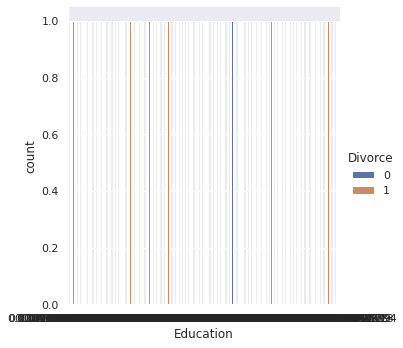

In [ ]:
ax1 = sns.catplot(x="Education", kind="count", hue="Divorce", data=df,
                  estimator=lambda x: sum(x==0)*100.0/len(x))

**4. ADA Boost**

In [ ]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.55

**5. XG Boost**

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.65